In [9]:
from typing import List

import autorootcwd  # noqa
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Load Features

In [6]:
dataset = pd.read_parquet("data/processed/specialized_features.parquet")

In [8]:
dataset.head()

,classes,sensor_1/acceleration/mean,sensor_2/acceleration/mean,sensor_3/acceleration/mean,sensor_5/acceleration/mean,sensor_1/acceleration/std,sensor_2/acceleration/std,sensor_3/acceleration/std,sensor_5/acceleration/std,sensor_1/acceleration/max,...,sensor_3/envelope_spectrum/peak/1000-1500,sensor_1/envelope_spectrum/peak/1500-2000,sensor_2/envelope_spectrum/peak/1500-2000,sensor_3/envelope_spectrum/peak/1500-2000,sensor_1/envelope_spectrum/peak/2000-3000,sensor_2/envelope_spectrum/peak/2000-3000,sensor_3/envelope_spectrum/peak/2000-3000,sensor_1/envelope_spectrum/peak/3000-5000,sensor_2/envelope_spectrum/peak/3000-5000,sensor_3/envelope_spectrum/peak/3000-5000
0,Classe D,0.009764,0.011494,0.006821,46.081684,0.095766,0.161612,0.283912,34.103872,0.338075,...,0.043331,0.011642,0.014371,0.027220,0.006016,0.011132,0.015732,0.003284,0.005861,0.020248
1,Classe A,0.009800,0.002345,0.006794,52.983700,0.098875,0.212293,0.275367,33.291273,0.198619,...,0.058383,0.015523,0.026444,0.017507,0.009347,0.019666,0.029743,0.007926,0.009953,0.038464
2,Classe A,0.005349,0.011791,0.005558,48.978503,0.010677,0.020596,0.023571,33.327310,0.027556,...,0.005079,0.001222,0.002334,0.002057,0.001103,0.000981,0.001957,0.000385,0.000479,0.001133
3,Classe B,0.000187,-0.005966,-0.001712,43.456594,0.085607,0.196855,0.205195,33.303451,0.235776,...,0.041395,0.014733,0.015544,0.025390,0.009173,0.011769,0.035746,0.006835,0.007478,0.023230
4,Classe D,0.006093,0.002964,0.001560,51.970055,0.060175,0.175737,0.192483,35.096457,0.170310,...,0.034065,0.012407,0.023082,0.030823,0.008708,0.012545,0.025165,0.004016,0.005429,0.023169


In [10]:
SENSOR_COLUMNS = {
    "acceleration": [f"sensor_{num}/acceleration" for num in [1, 2, 3, 5]],
    "velocity": [f"sensor_{num}/velocity" for num in [1, 2, 3]],
    "fft": [f"sensor_{num}/fft" for num in [1, 2, 3, 5]],
    "envelope_spectrum": [f"sensor_{num}/envelope_spectrum" for num in [1, 2, 3]],
}

In [ ]:
def features_boxplot(
    df: pd.DataFrame,
    representation: str,
    features: List[str],
) -> None:
    """
    Generate boxplots to visualize the distribution of features in a DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        representation (str): The type of representation to use for the boxplots.
        features (List[str]): The list of features to visualize.

    Returns:
        None
    """
    double_column_plot = (representation == "acceleration") or (representation == "fft")
    if double_column_plot:
        ncols = 2
    else:
        ncols = 1
    
    fig, axs = plt.subplots(
        nrows=len(features), ncols=ncols, figsize=(20, 4 * len(features))
    )
    for i, feature_list in enumerate(features):
        data = pd.melt(
            dataset,
            id_vars=["classes"],
            value_vars=feature_list,
        )        
        if double_column_plot:
            axes_first_plot = axs[i, 0]
            sns.boxplot(
                data=data[data.variable.str.contains("sensor_5")],
                x="variable",
                y="value",
                hue="classes",
                showfliers=False,
                ax=axs[i, 1],
            )
        else:
            axes_first_plot = axs[i]
        sns.boxplot(
            data=data[~data.variable.str.contains("sensor_5")],
            x="variable",
            y="value",
            hue="classes",
            showfliers=False,
            ax=axes_first_plot,
        )
            

    plt.tight_layout()
    plt.show()

### Statistical Features class comparison

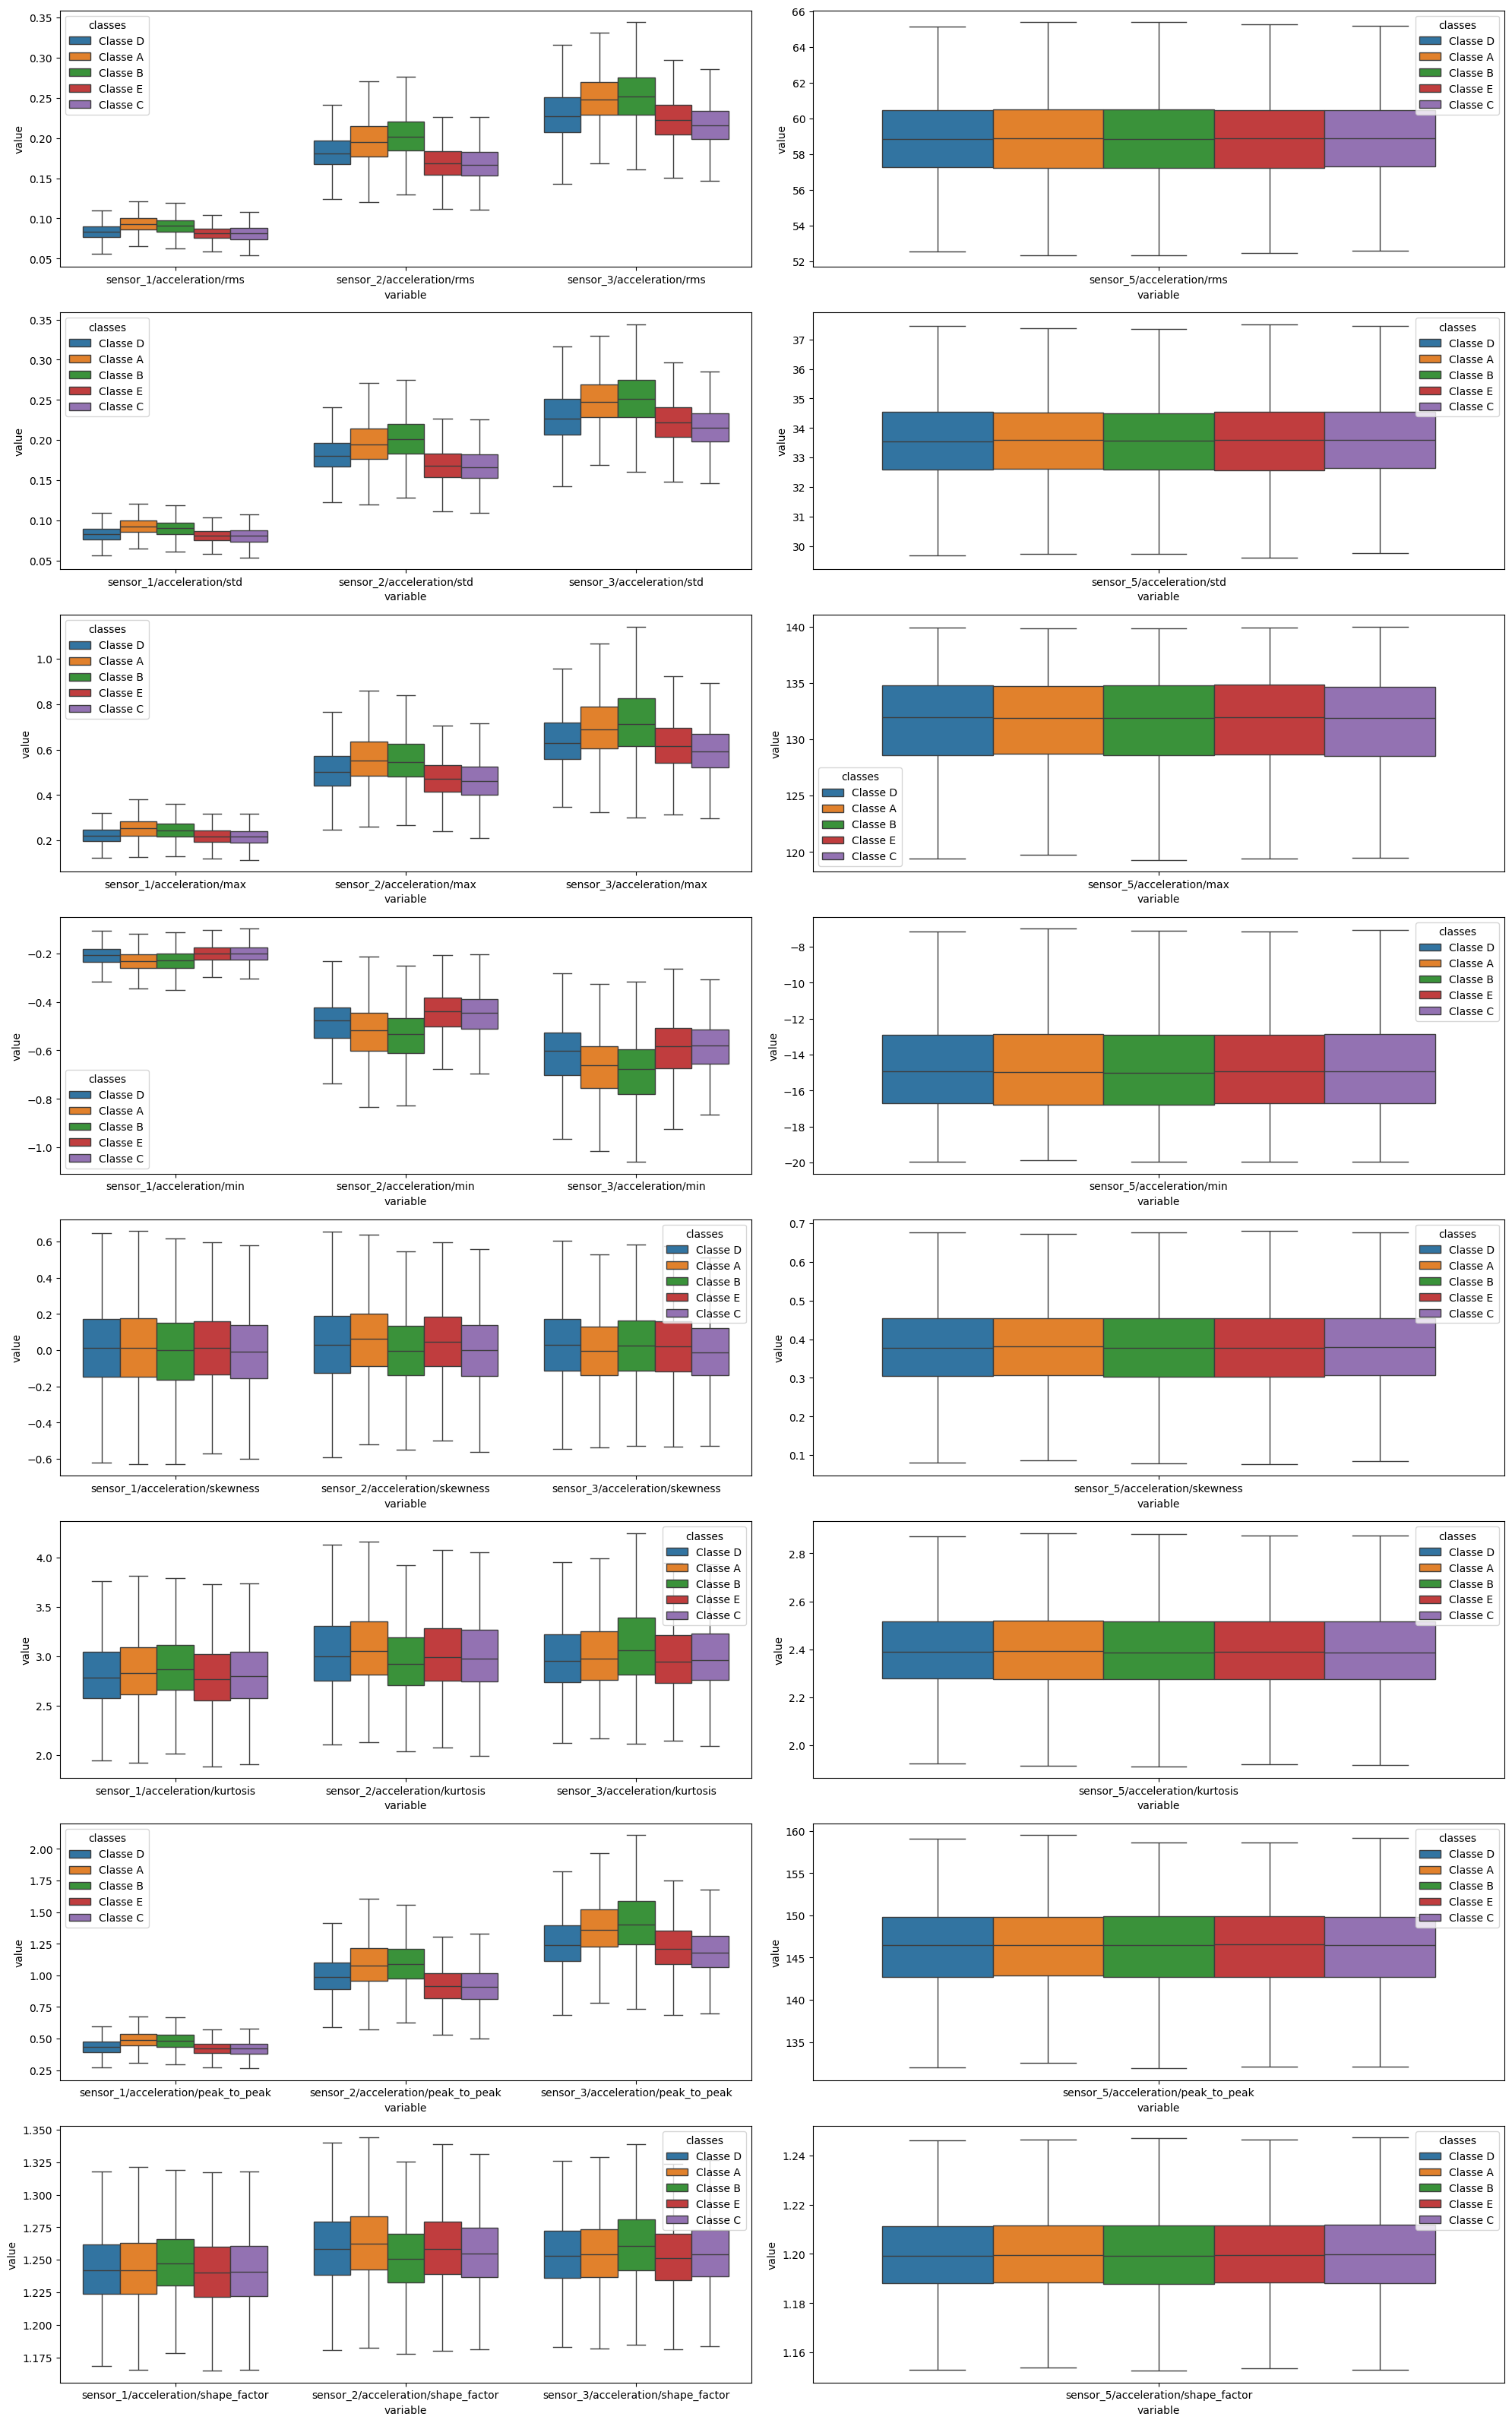

In [30]:
features = ["rms", "std", "max", "min", "skewness", "kurtosis", "peak_to_peak", "shape_factor"]
representation = "acceleration"

features_list = [[f"{signal}/{feature}" for signal in SENSOR_COLUMNS[representation]] for feature in features]

features_boxplot(dataset, representation, features_list)

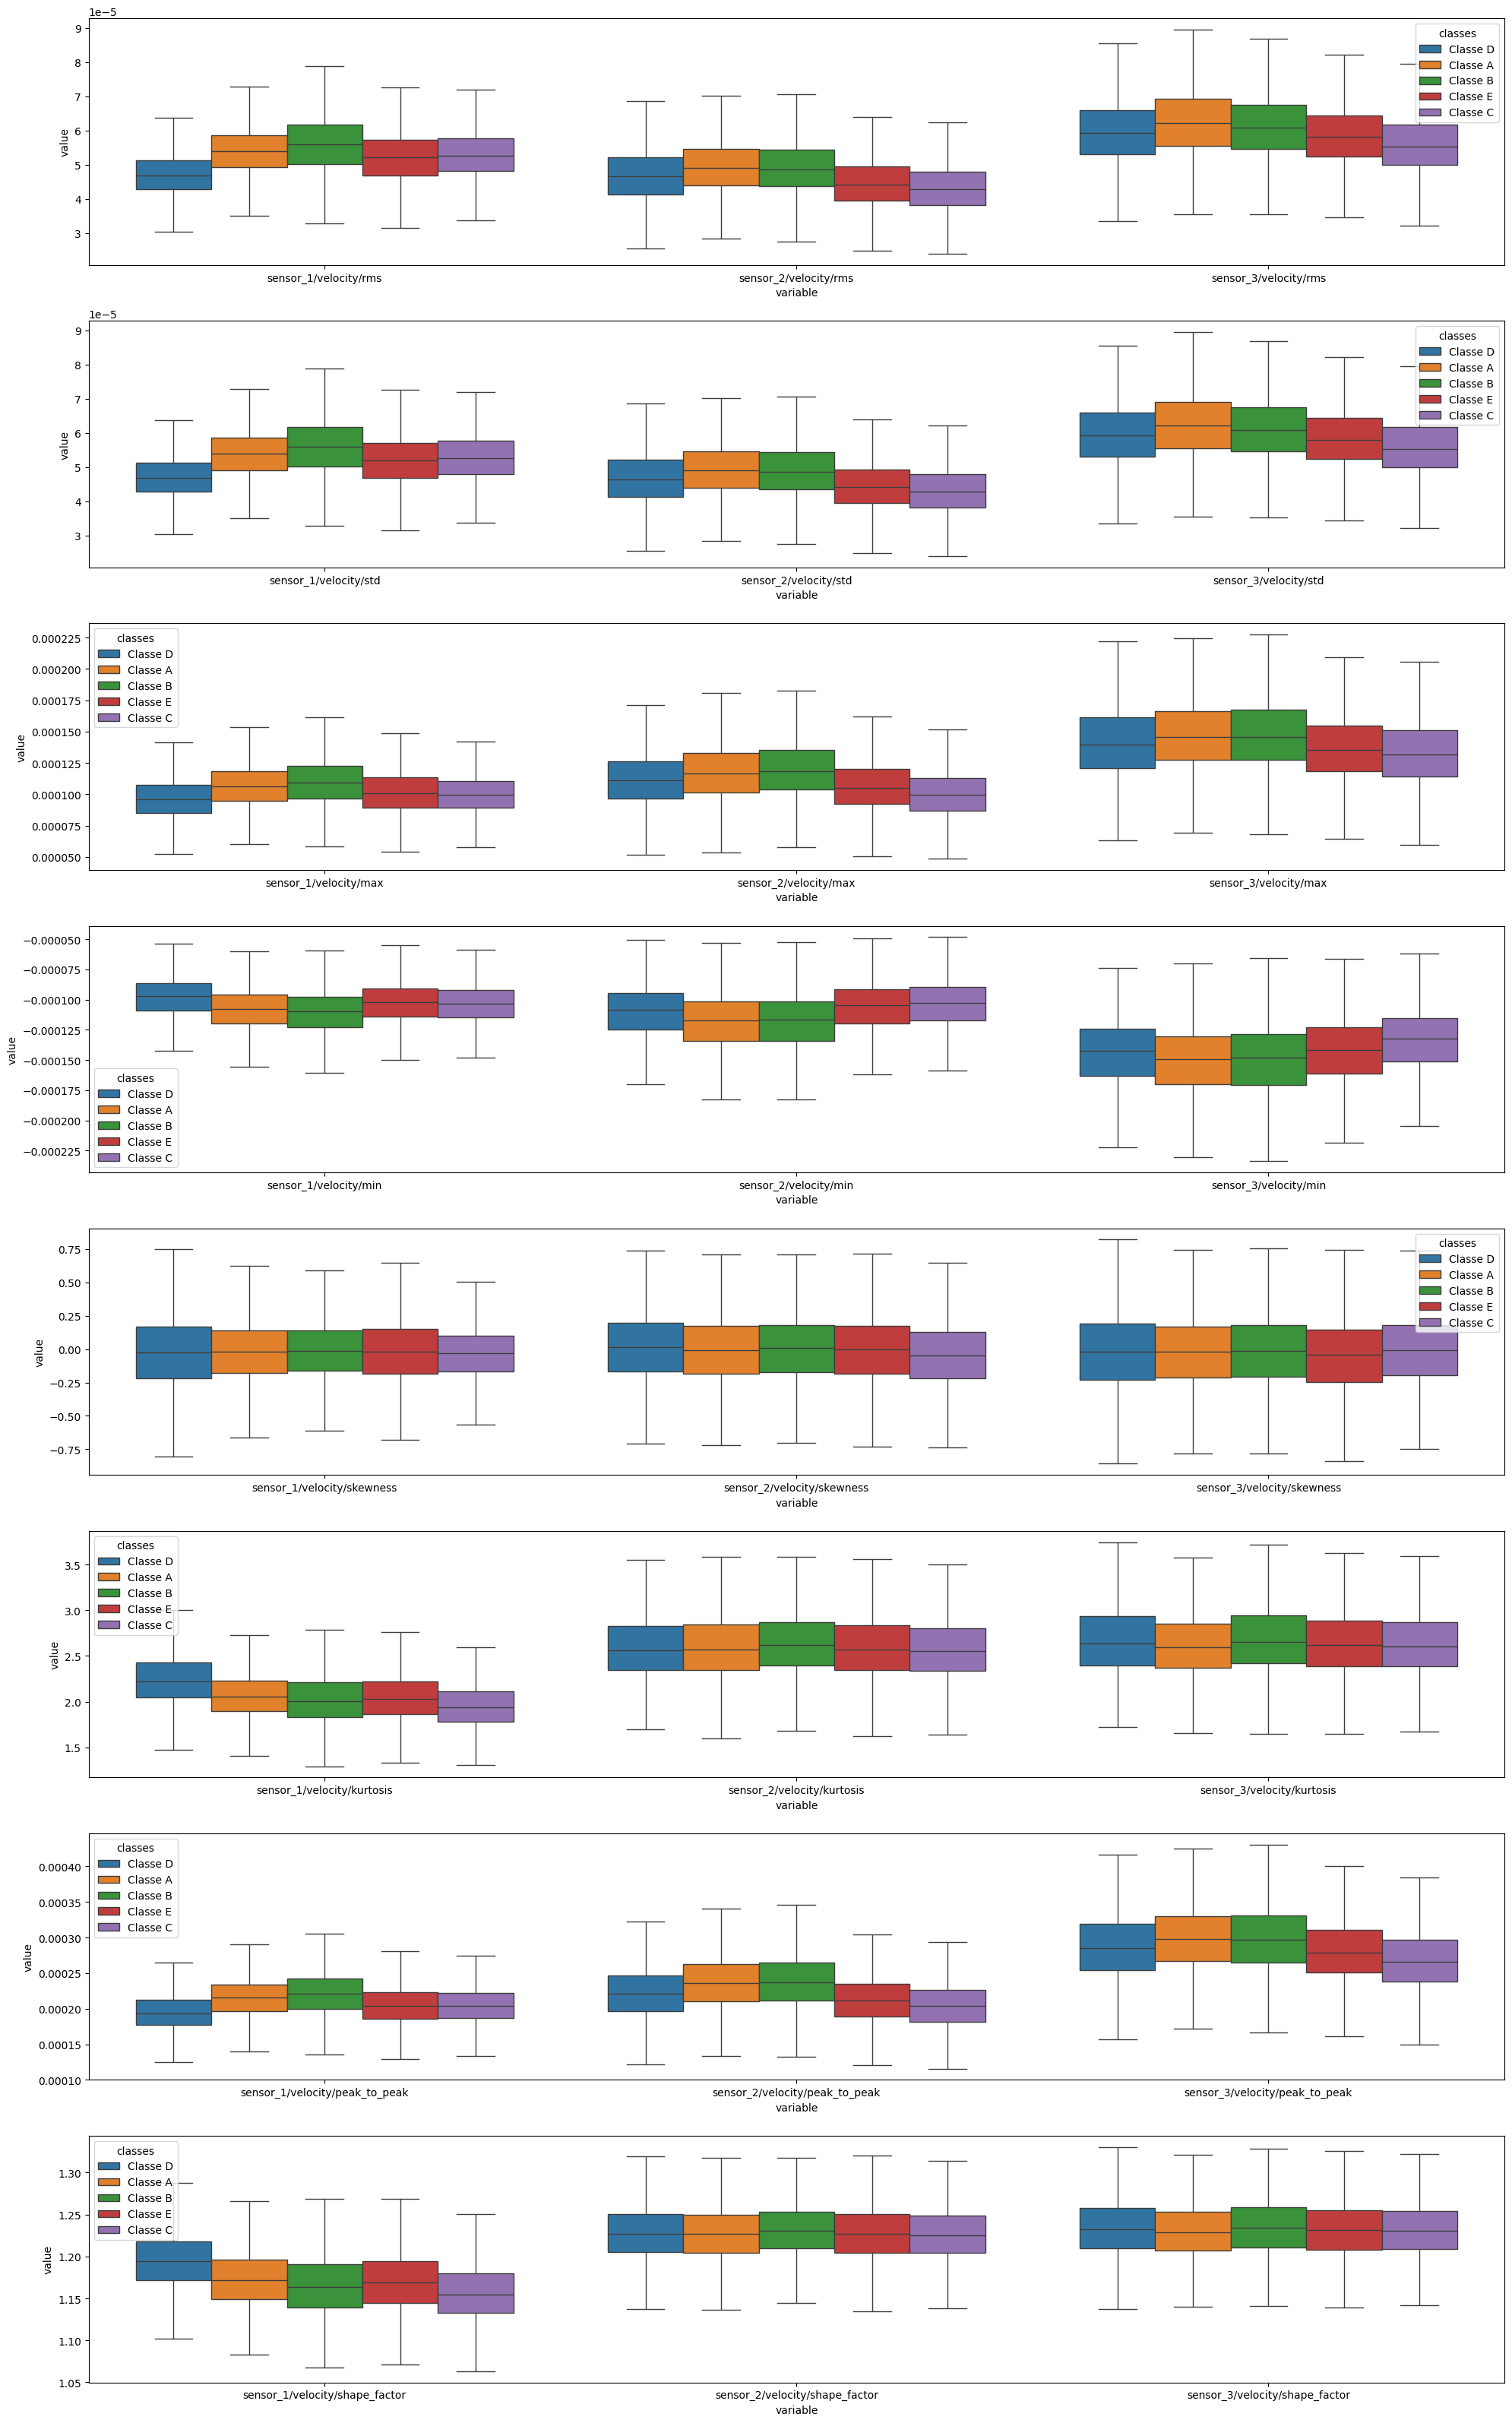

In [31]:
representation = "velocity"

features_list = [[f"{signal}/{feature}" for signal in SENSOR_COLUMNS[representation]] for feature in features]

features_boxplot(dataset, representation, features_list)

### Impulsive Features class comparison

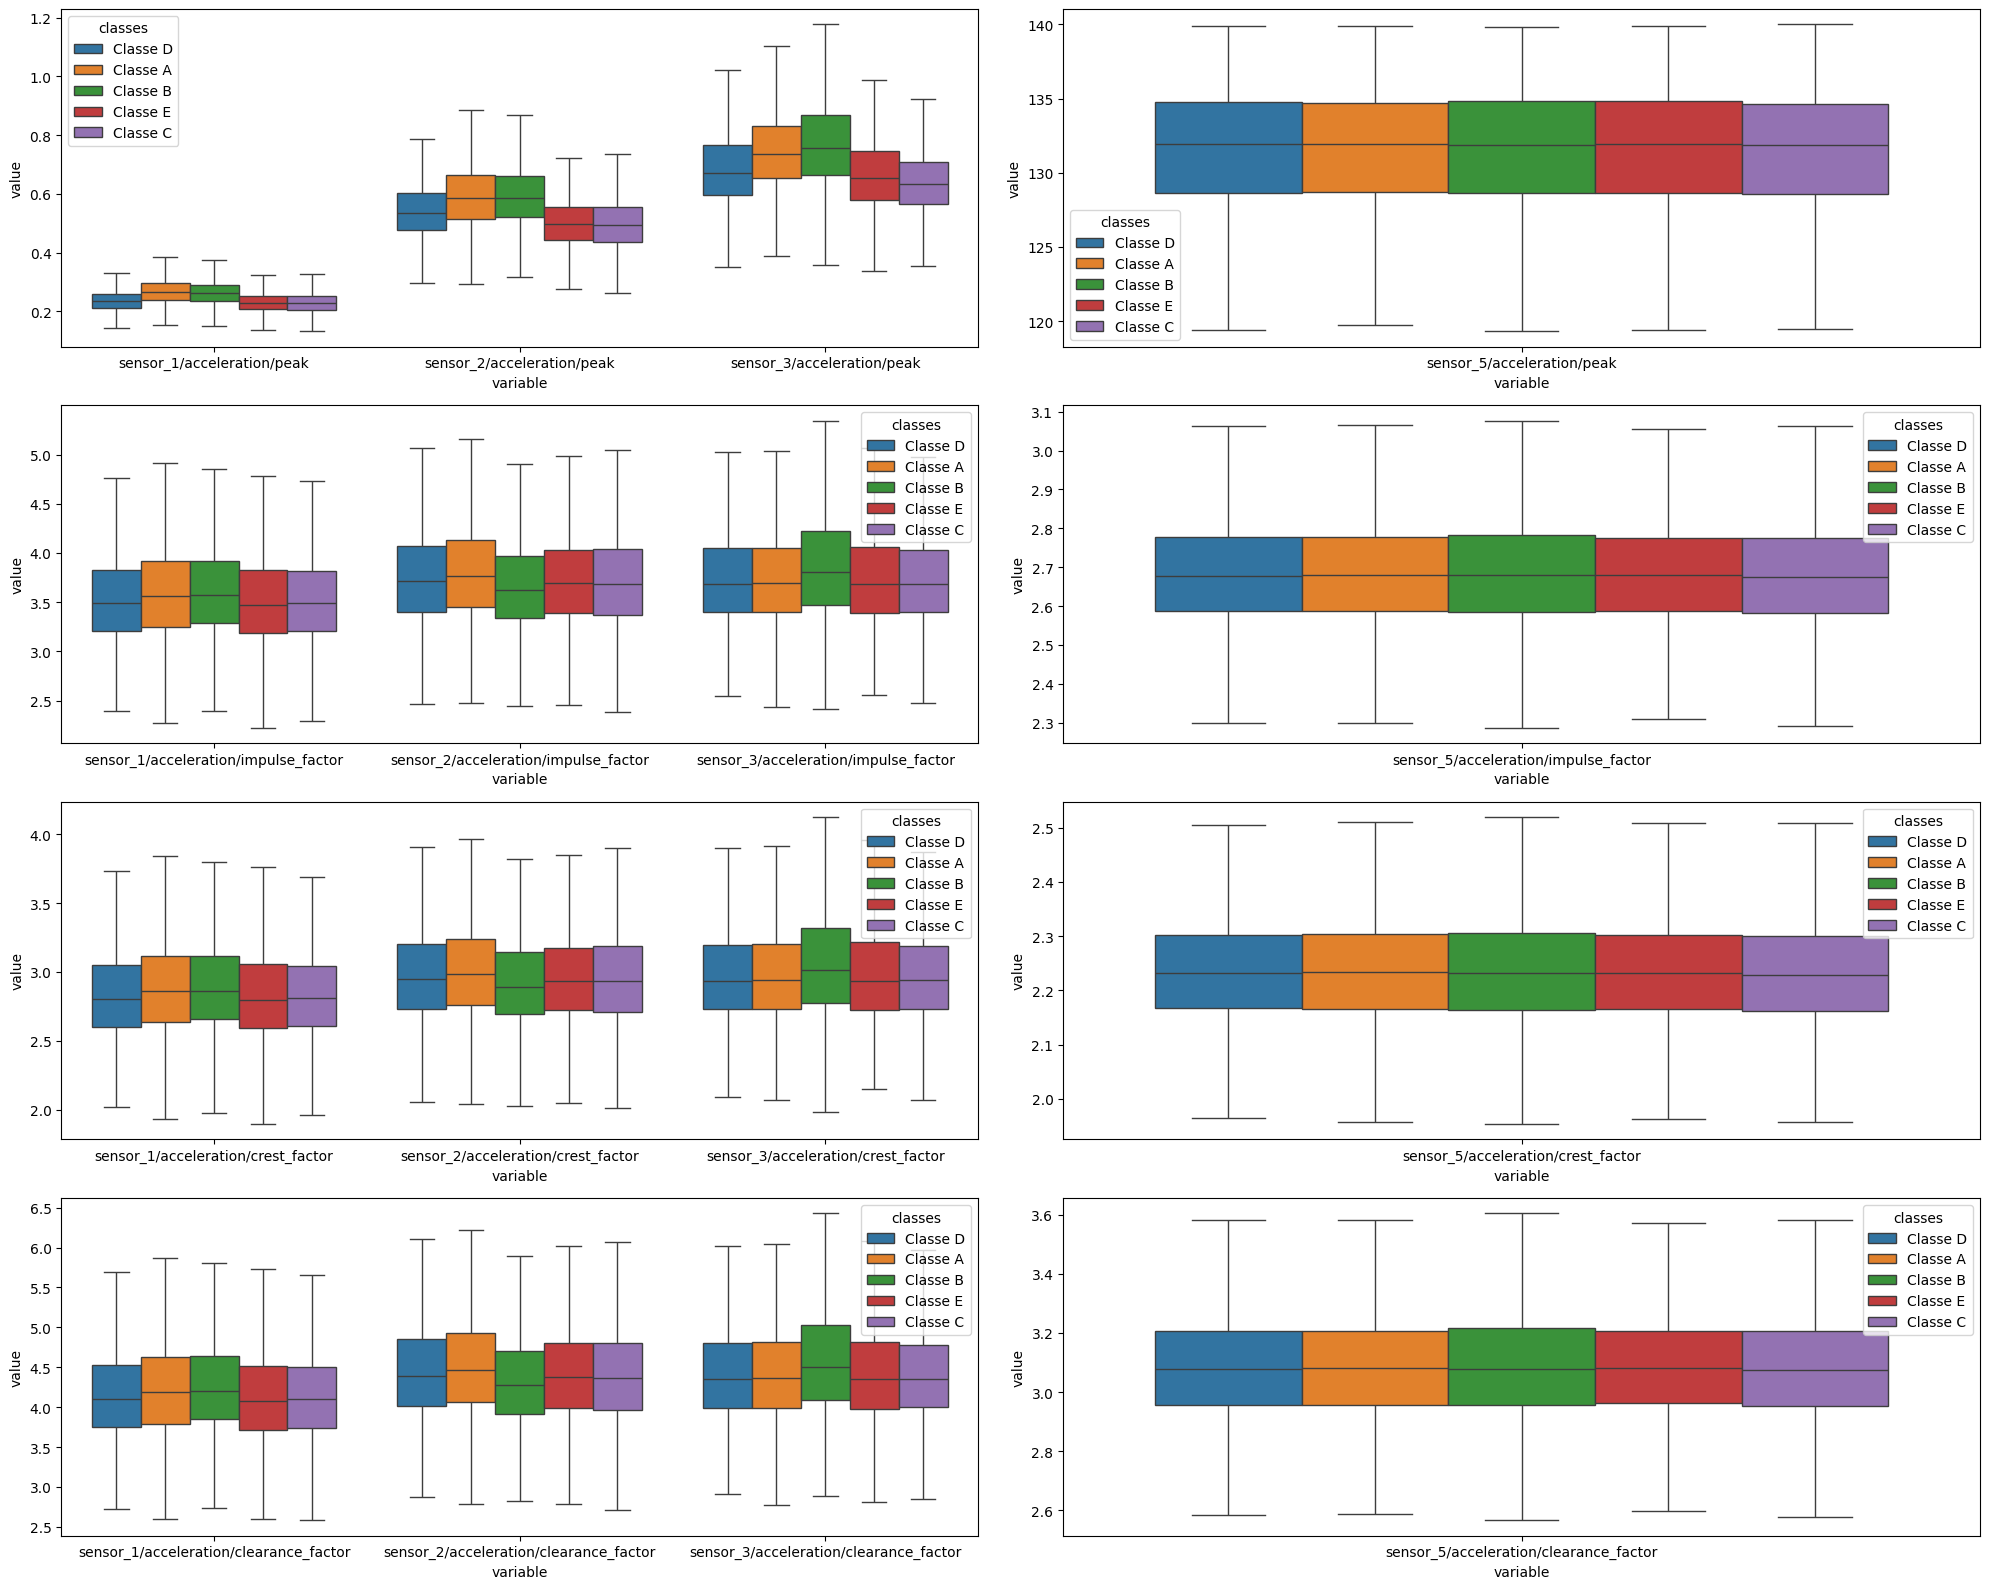

In [32]:
features = ["peak", "impulse_factor", "crest_factor", "clearance_factor"]
representation = "acceleration"

features_list = [[f"{signal}/{feature}" for signal in SENSOR_COLUMNS[representation]] for feature in features]

features_boxplot(dataset, representation, features_list)

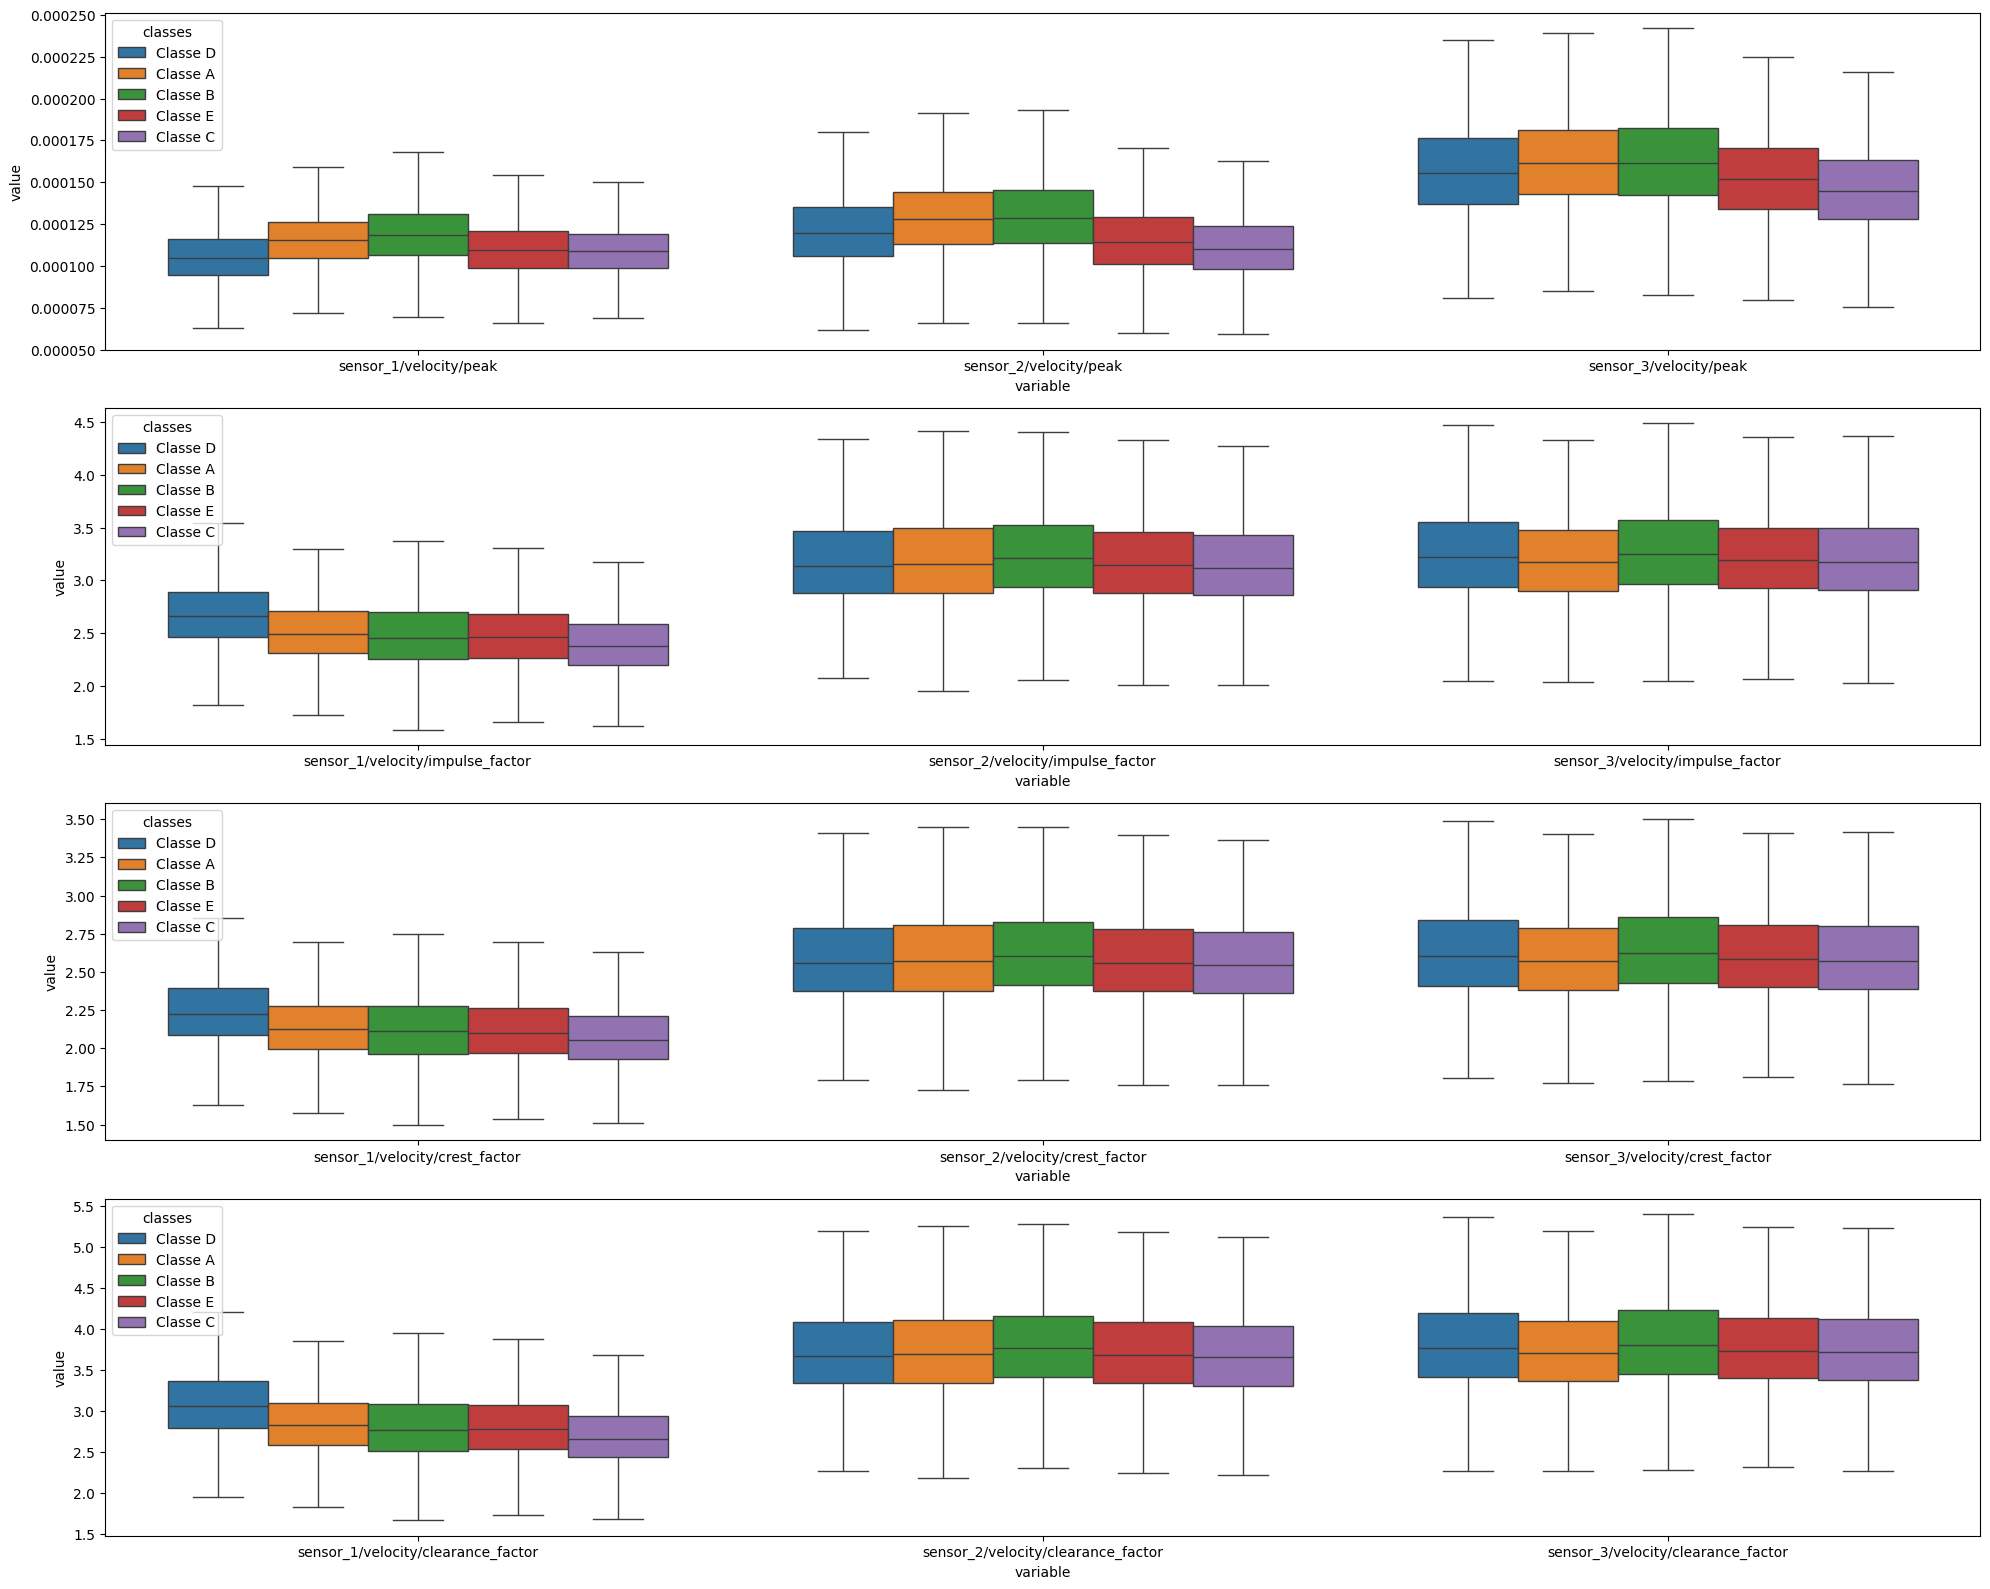

In [33]:
representation = "velocity"

features_list = [[f"{signal}/{feature}" for signal in SENSOR_COLUMNS[representation]] for feature in features]

features_boxplot(dataset, representation, features_list)

### Spectral domain Features class comparison

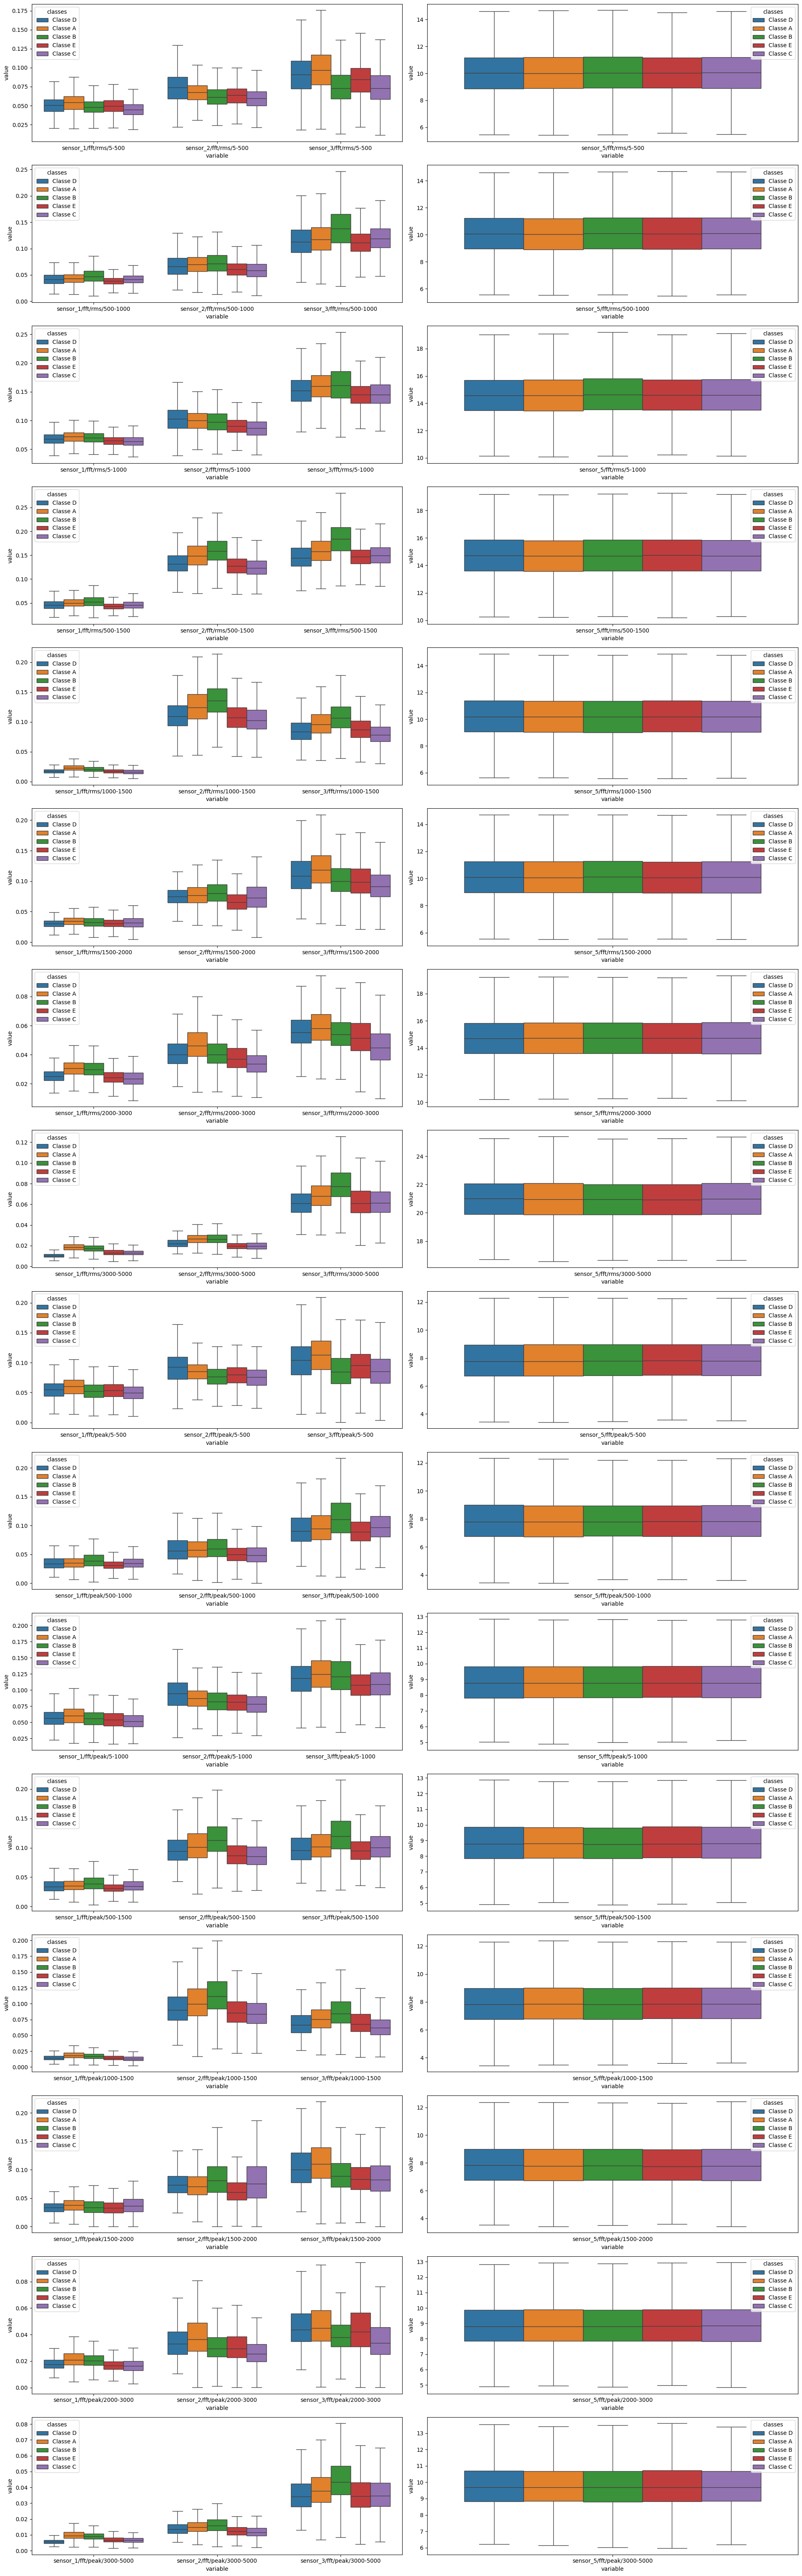

In [35]:
features = ["rms", "peak"]
representation = "fft"
freq_bands = [
    [5, 500],
    [500, 1000],
    [5, 1000],
    [500, 1500],
    [1000, 1500],
    [1500, 2000],
    [2000, 3000],
    [3000, 5000],
]

features_list = [
    [
        f"{signal}/{feature}/{freq_band[0]}-{freq_band[1]}"
        for signal in SENSOR_COLUMNS[representation]
    ]
    for feature in features
    for freq_band in freq_bands
]

features_boxplot(dataset, representation, features_list)